# Instruments and Catalogue matching

Requested ingredients:
* fits file of a known instrument (sdss, hst, ptf, stella) having a wcs solution
* an internet connection (for the 'download_catalogue' method)

## Instrument vs. Image

An instrument has several additional functionalities in comparison to an Image.
* fundatental parameters:
   * bandname (enabling bandpass and lbda)
   * mab0 (zeropoint of the instrument)
   * _dataunits_to_election (that enables aperture photometry using sep).


**Remark**: 'Instrument' inherite from 'Image'. 

**Code Construction**: The mother class is 'Image', then a basic 'BaseInstrument' is defined that structures the future individual instruments: 'SDSS', 'HST' etc that all are classes inheriting 'BaseInstrument' (i.e. grand child of Image). 

**Info** the list of known instrument is recorded in astrobject.astrobject.instruments.instrument.KNOWN_INSTRUMENTS

In [1]:
# no annoying warnings
import warnings
warnings.filterwarnings('ignore')
# Astrobject module

# plot within the notebook
%matplotlib notebook

In [2]:
from astrobject import get_instrument 

## Load the Instrument. Easy

Load the instrument, here the "sdss" object

In [3]:
sdss = get_instrument("data/sdss_PTF10qjq_g.fits")

The visualisation is the same as for Image (same method inherated)

<IPython.core.display.Javascript object>


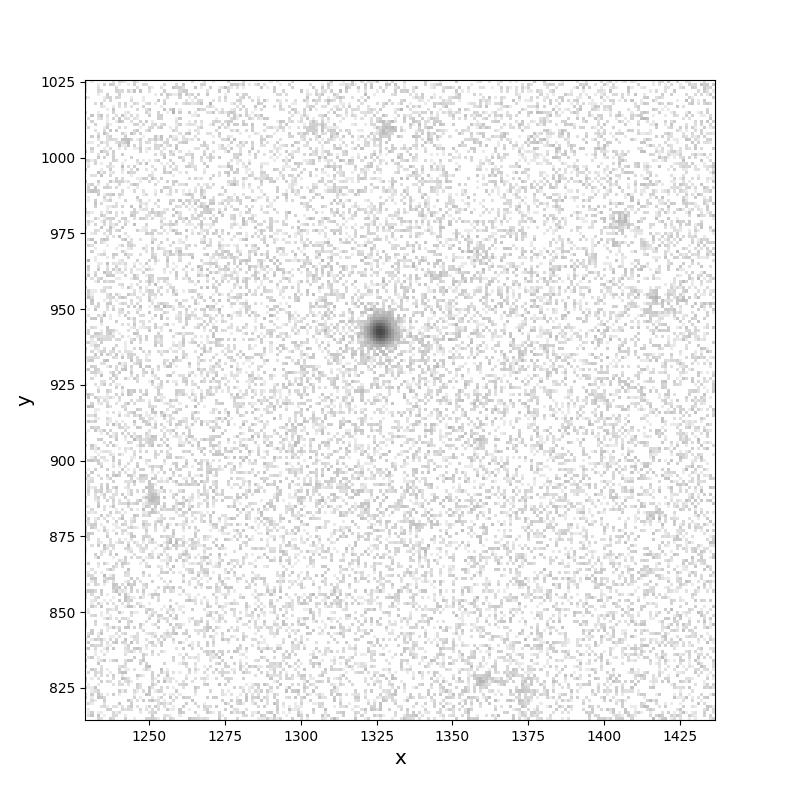

In [4]:
pl = sdss.show()

## Load a catalogue for the image's field of view

If you have access to internet, the download_catalogue() methods enables you to directly query for the catalogue associated to your image. 
When you do so, you can specify the catalogue properties:
Catalogue arguments:

* source: The origin of the catalogue (SDSS/WISE/2MASS)
* column_filters: a dictionnary selecting the catalogue sources. For instance, if you want the sdss sources that have a magnitude range in the g-band between 13 and 22: column_filters={"gmag":"13..22"}. **Important, SDSS** catalogue have default column_filters: 
  - "mode" must be 1 (primary=latest release), 
  - "q_mode" is "+" means photometry condition,
  - "Q" in [2,3] (acceptable and good) [see vizier](http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=V/139)

**Remark** This functionnality is also accessible from an 'image' object.

In [9]:
sdss.download_catalogue(source="sdss",column_filters={"gmag":"13..22"},force_it=True) 

ValueError: cl is not a known data entry. Set testkey to avoid the test

You can now visualize the catalogue using the show() method

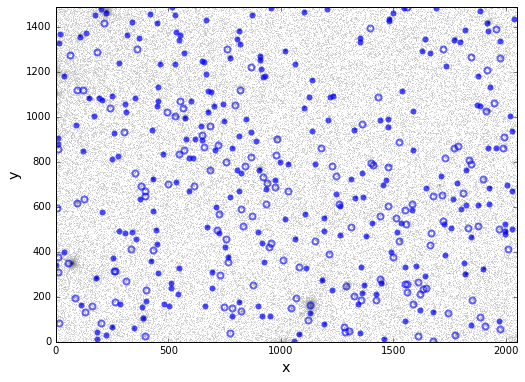

In [6]:
pl = sdss.show(show_catalogue=True)

**_Read the plot_** Full marker = stars / Open markers = non-stars (galaxies)

### Getting Gaia instead

Gaia only has stars

In [7]:
sdss.download_catalogue(source="gaia",force_it=True) 

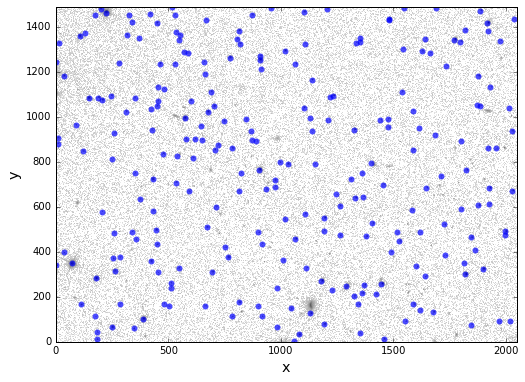

In [8]:
pl = sdss.show(show_catalogue=True)

## Let's switch back to sdss for now on

In [9]:
sdss.download_catalogue(source="sdss",column_filters={"gmag":"13..22"},
                        force_it=True) 

#### Extract the sources. 
Since the 'instrument' has a catalogue and a wcs solution, they are passed to the SexObject created (sepobjects).

**Remark** The order does not matter, if you first run sep_extract() and then load a catalogue, the catalogue will still be given to the sepobjects.

In [5]:
sdss.sep_extract()

Now than a catalogue and source extraction are associated to the image, detected sources and objects in the catalogue are matched. Let's first see what the show() methods show.

<IPython.core.display.Javascript object>


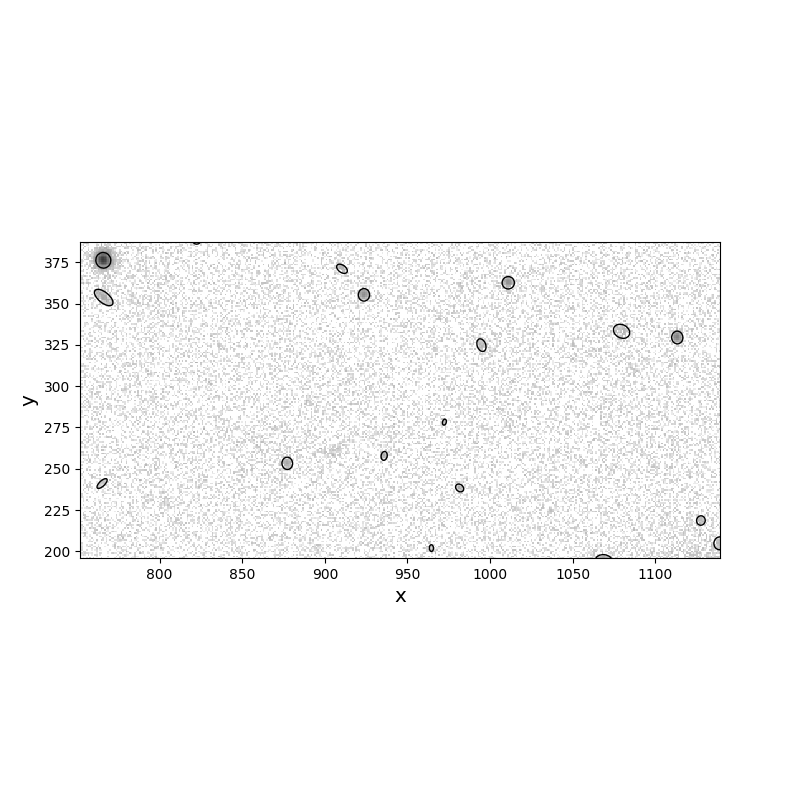

In [6]:
pl = sdss.show(show_sepobjects=True, show_catalogue=False)

**_Read the plot_** In red the objects in the catalogue with no source matched (too faint most likely). Open and filled marker show galaxies and stars respectively.

In [7]:
sdss.sepobjects.data

id,flux,var,lbda,mjd,bandname,zp,zpsys
str27,float64,float64,float64,float64,str5,object,str2
"177.98086870,0.42274717",0.4691810607910156,nan,nan,51991.47022418981,sdssg,None,ab
"1001.55306980,0.76624698",5.003009796142578,nan,nan,51991.47022418981,sdssg,None,ab
"1058.05095474,1.19558796",1.3621826171875,nan,nan,51991.47022418981,sdssg,None,ab
"549.90325716,1.54658368",0.2668180465698242,nan,nan,51991.47022418981,sdssg,None,ab
"1277.36174009,2.08259071",0.20119857788085938,nan,nan,51991.47022418981,sdssg,None,ab
"1678.03574989,4.47903543",7.209686279296875,nan,nan,51991.47022418981,sdssg,None,ab
"961.03657075,4.69366562",0.7891616821289062,nan,nan,51991.47022418981,sdssg,None,ab
"1016.69880899,5.18371435",13.541566848754883,nan,nan,51991.47022418981,sdssg,None,ab
"2044.48641432,5.46439292",1.2766189575195312,nan,nan,51991.47022418981,sdssg,None,ab


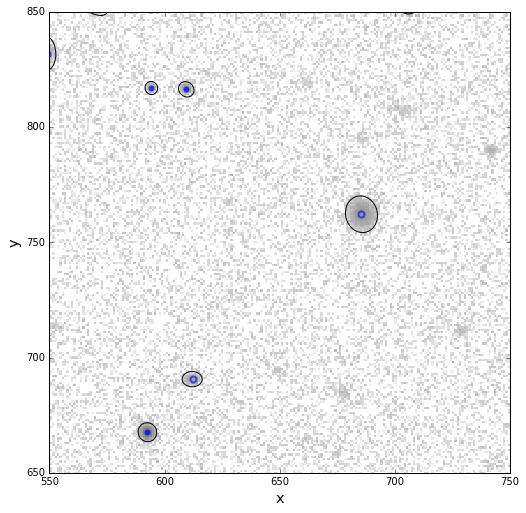

In [12]:
# lets zoom in
pl = sdss.show(zoomon=[650,750],show_sepobjects=True, 
               show_catalogue=True, zoom=100)

**_Read the plot_** Full marker = stars / Open markers = non-stars (galaxies) ; Red=non detected / Blue= detected

### Catalogue and Sepobjects

The information relating the catalogue object index to the sep onces are registered in the 'catmatch' dictionnary. You can check that the sepobjects has a catalogue and catalogue matching using the 'has_catalogue()' and 'has_catmatch()' methods.

In [13]:
sdss.sepobjects.catmatch

{'angsep': <Angle [  2.15987066e-05,  5.81640422e-05,  3.37818770e-05,
           2.97630446e-05,  3.41166982e-05,  1.84879697e-04,
           1.36225842e-05,  5.14889504e-05,  1.51727719e-05,
           3.20730222e-05,  2.17385745e-04,  4.12099436e-05,
           2.96823777e-05,  1.16618906e-05,  2.11838570e-05,
           2.68911744e-05,  5.81892540e-05,  2.96557347e-05,
           1.11412880e-05,  5.43419990e-05,  5.51319267e-04,
           5.53450137e-05,  2.80644660e-05,  2.07082833e-05,
           1.34810468e-05,  1.17806774e-05,  2.27115197e-05,
           3.46120476e-05,  1.11097751e-04,  4.03485431e-05,
           4.76022006e-05,  3.44975454e-05,  7.04217536e-06,
           4.89569420e-05,  1.89443695e-05,  5.68101161e-05,
           1.16104340e-05,  3.43762884e-05,  2.26372234e-05,
           3.44115261e-05,  2.59729283e-05,  2.77767058e-05,
           3.40780955e-05,  1.78170167e-05,  1.08876683e-05,
           2.30207639e-05,  3.16220800e-05,  4.62723034e-05,
           5.1

With a catalogue, you have access to additional information like stars mask; the catalogue knowing which object is a stars and which is not. This way you can use the "stars_only" input in a lot of methods.

**_Info masks_** The star mask is accessible though the 'starmask' array in the self function. Similarly, you have the "isolatedmask" that indicate the catalogue objects (all kinds) that do not have neighbour closer than 10arcsec. You can change this parameter using the "define_around" method of the catalogue instance.

** _Tip_** 'get_indexes()': This method enables to return the indexes of the detected sources that follow the following cuts: 

* isolated_only [False] get the indexes of the stars only
* stars_only [False] get the indexes of the isolated object only
* catmag_range [None,None] get the indexes of the object within the magnitudes ranges
* cat_indexes [False] Get the indexes of the calague object instead of the sextracted sources

In [32]:
import numpy as np
np.max(np.std(sdss.sepobjects.radec,axis=0)*5)

0.37082218228602326

In [25]:
sdss.wcs.diag_size

0.26739724912820545

In [14]:
print "The ellipse parameters x,y and theta for the detected stars"
from astropy.table import Table
mask = sdss.sepobjects.get_indexes(stars_only=True, isolated_only=False)
t_ = Table(data=[sdss.sepobjects.get("x",mask=mask),
                 sdss.sepobjects.get("y",mask=mask),
                 sdss.sepobjects.get("theta",mask=mask)],
          names=["x","y","theta"])
print t_
    

The ellipse parameters x,y and theta for the detected stars
      x             y            theta     
------------- ------------- ---------------
3.03489601132 340.078614825  -1.53724265099
182.912026585 12.4795196847  -1.33823871613
113.978412234 165.322063224  -1.56478106976
183.567629411  44.186652875   -1.1375784874
223.399212482 31.1352198361   1.34720647335
38.0716481251 396.385901817 -0.917294859886
251.127865568  66.219852814  -1.43333411217
 179.47459263  282.73481799   1.27616763115
346.256374528 60.0186418725  -1.04276895523
287.350737636 168.850363079  -1.51130068302
          ...           ...             ...
1819.83355435 1386.50794711  -1.21531105042
1923.08408392 1379.67448546 -0.627840280533
1885.50120807 1470.70831943  -1.48380231857
1917.39879622 1414.85850011   1.40817213058
1974.28512484 1336.45923349   -0.7439904809
2037.27305569  1435.5507513   1.02882540226
1456.37437181 13.9750062112  -1.03847932816
1553.24831525  91.873451968  -1.42972481251
1675.88316392 13

### Visualization of the detected source parameters

In addition to the 'diplay()' method, that enables to display the source ellipses in a axis (used by the image.show() method, two methods exists to visualize the source properties:

* show_ellipses: illustrate the source ellipses parameters
* show_hist: histogram of any parameters (any parameters accessible though the get())

**_Tip_**: the masking inputs (stars_only etc.) are arguments of the ploting functions.

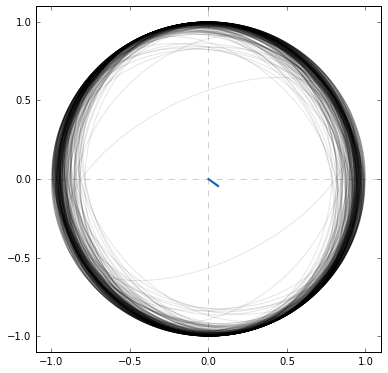

In [15]:
sdss.sepobjects.show_ellipses(stars_only=True, nonstars_only=False)

**_Read the plot_** All grey lines represent the shape of each detected source ellipses. The blue line (triangle in fact, but usually really thin if a lot of sources) is the typical PSF angle; the size is the ellipticity

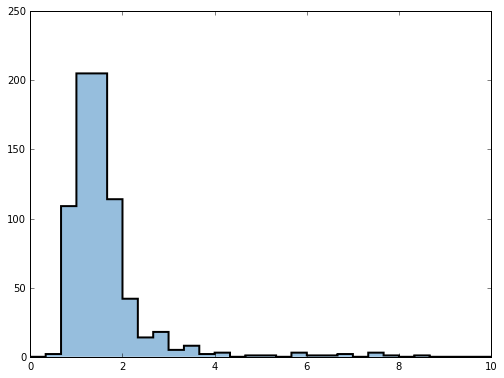

In [16]:
# show the distribution of any keyword
sdss.sepobjects.show_hist("a",bins=30, range=[0,10])

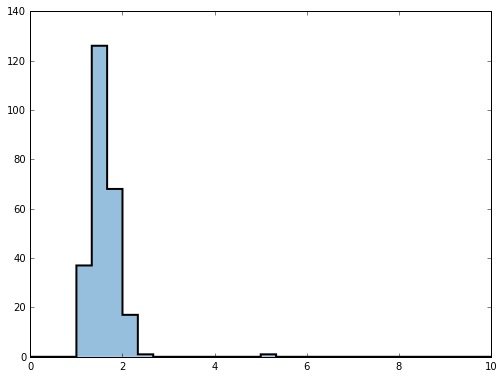

In [17]:
# - or just for the stars
sdss.sepobjects.show_hist("a",bins=30, range=[0,10], 
                          mask= sdss.sepobjects.get_indexes(stars_only=True))

# End
***